In [1]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
import numpy as np

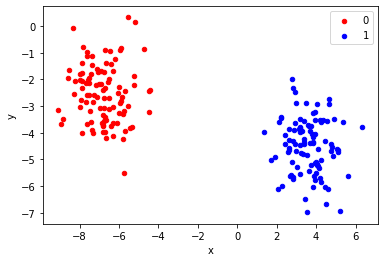

In [2]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2)
one = np.ones((200,1))
X = np.append(X,one, axis=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [3]:
print(y.shape)
# print(X)

(200,)


In [5]:
# def generate_weightmatrix(n):
w_ij = np.random.rand(2,3)#2 inputs * 2 nodes hidden layer
w_ki = np.random.rand(1,3) # 1 output * 2 nodes in previous layer output layer
# print(w_ki)

In [6]:
def calculate_predvalue(input_val, weight):
    weighted_sum = []
    temp = np.matmul(weight, input_val.T)
#     print(temp)
    return temp

In [7]:
def sigmoid(z):
    sig = 1/(1+ np.exp(-z))
    return sig

In [8]:
def derivative(z):
    d = z * (1-z)
    return d

In [10]:
max_iter = 1
learning_rate = 0.00001
error = []
for i in range(max_iter):
    print("**************Epoch:",i)
    thresh=[]
    h_j = []
    h_i = []
    
    weighted_sum_hiddenlayer = []
    weighted_sum_outputlayer = []
    
#     for j in range(len(X)):
    weighted_sum_hiddenlayer = calculate_predvalue(X,w_ij)
    b1 = np.ones((1,200))
    WS1 = np.array(weighted_sum_hiddenlayer)
    
    temp2 = WS1.T
    for p in temp2:
        temp = []
        for q in p:
            temp.append(sigmoid(q))
        h_i.append(temp)
    y_hid = np.array(h_i)
    h_j = y_hid.T
    h_j_bias = np.append(h_j,b1,axis = 0)
#     print(h_j_bias.shape)
#     break
    
    weighted_sum_outputlayer = calculate_predvalue(h_j_bias.T, w_ki)
    WS2 = np.array(weighted_sum_outputlayer)
#     print(WS2.shape)
#     break
    temp = []
    temp1 = []
    for p in WS2:
        for i in p:
            temp.append(sigmoid(i))
    y_k = np.array(temp) ## Converting the activated output of outputlayer into an array
    y_k = y_k.T
    error = y - y_k
    temp1.append(error)
    error = np.array(temp1)

    ##Calculating the delta_k for updating the weight between hidden layer- output layer
    d_w = derivative(WS2)
    delta_k = error * d_w
    print(delta_k.shape)
    break
    delta_w_ki = np.matmul(delta_k, h_j_bias.T)
#     print(delta_w_ki.shape)
#     break
    
    d_wj = derivative(h_j)
#     print(d_wj.shape)
#     break
 
#     temp =  []
#     for i in range(d_w.shape[0]):
#         temp.append(error[i]*d_w[i][0])
#     temp=np.array(temp)
#     temp1 = []
#     print(temp)
#     break

#     print(delta_w_ki)
#     delta_wij = np.dot(weightsum_first_layer.T, np.dot(error * derivative(), weightsum_hidden_layer.T) * derivative(weightsum_first_layer))
    delta_wij = delta_w_ki * w_ki * d_wj
#     print(delta_wij)
#     break
#     print(type(delta_wij))
#     print(delta_wij.shape)
#     break;
    w_ij += (delta_wij * learning_rate)
    w_ki += (delta_wki * learning_rate)

**************Epoch: 0
(1, 200)


In [ ]:
W